# Import Python Packages

In [1]:
pip install --upgrade category_encoders

Requirement already up-to-date: category_encoders in /Users/shobhasankar/opt/anaconda3/lib/python3.7/site-packages (2.2.2)
You should consider upgrading via the '/Users/shobhasankar/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python

You should consider upgrading via the '/Users/shobhasankar/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import category_encoders as ce

%matplotlib inline

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Load the Data

In [5]:
# Code for reproducing the same test/train dataset
# data = '/Users/shobhasankar/W210/pollutemenot-ai/Madhukar/Dataset_with_merged_SSURGO_NHD_variables/2021.03.09_ssurgo_nhd_merged.csv'
# df_nhd_ss = pd.read_csv(data)

# data_subset_89='/Users/shobhasankar/W210/test-dir/sac_saw_subset_01_89.csv'
# df_sac_saw_89 = pd.read_csv(data_subset_89)

# df_merged_89 = pd.merge(df_sac_saw_89, df_nhd_ss, left_on = 'da_number', right_on = 'da_number', how = 'left')

# X = df_merged_89.drop(['cwa_determination'], axis=1)
# y = df_merged_89['cwa_determination']

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [6]:
data = '/Users/shobhasankar/W210/pollutemenot-ai/Madhukar/Archived/Dataset_with_merged_SSURGO_NHD_variables/2021.03.09_ssurgo_nhd_merged.csv'
df_nhd_ss = pd.read_csv(data)

In [7]:
df_nhd_ss.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'jurisdiction_type', 
                'district', 'project_name', 'longitude', 'latitude',
                'date_issued_or_denied', 'project_name', 'cwa_determination',
                'index', 'Index', 'mukey', 'date_issued_or_denied','rha_determination',
                'rha1','rha2','cwa1','cwa2','cwa3','cwa4','cwa5','cwa6','cwa7','cwa8','cwa9',
                'potential_wetland','index','mukey','Index'],axis=1,inplace=True)
df_nhd_ss.head()

,da_number,nhd_vars_wb_200m,nhd_vars_fl_200m,wb_comid_list_200m,wb_ftype_str_list_200m,wb_gnis_id_list_200m,wb_area_list_200m,fl_comid_list_200m,fl_ftype_str_list_200m,fl_gnis_id_list_200m,fl_length_list_200m,fl_areasqkm_sum_200m,fl_areasqkm_count_200m,fl_areasqkm_mean_200m,fl_gnis_name_ind_sum_200m,fl_gnis_name_ind_count_200m,fl_gnis_name_ind_mean_200m,fl_totdasqkm_sum_200m,fl_totdasqkm_count_200m,fl_totdasqkm_mean_200m,fl_flow_type_sum_200m,fl_flow_type_count_200m,fl_flow_type_mean_200m,fl_streamorde_sum_200m,fl_streamorde_count_200m,fl_streamorde_mean_200m,fl_intephem_sum_200m,fl_intephem_count_200m,fl_intephem_mean_200m,fl_startflag_sum_200m,fl_startflag_count_200m,fl_startflag_mean_200m,fl_divergence_sum_200m,fl_divergence_count_200m,fl_divergence_mean_200m,wb_comid_str_200m,wb_ftype_str_200m,wb_gnis_id_str_200m,wb_area_sum_200m,wb_area_count_200m,wb_area_mean_200m,wb_gnis_name_ind_sum_200m,wb_gnis_name_ind_count_200m,wb_gnis_name_ind_mean_200m,fl_comid_str_200m,fl_ftype_str_200m,fl_gnis_id_str_200m,fl_length_sum_200m,fl_length_count_200m,fl_length_mean_200m,nhd_vars_wb_2500m,nhd_vars_fl_2500m,wb_comid_list_2500m,wb_ftype_str_list_2500m,wb_gnis_id_list_2500m,wb_area_list_2500m,fl_comid_list_2500m,fl_ftype_str_list_2500m,fl_gnis_id_list_2500m,fl_length_list_2500m,fl_areasqkm_sum_2500m,fl_areasqkm_count_2500m,fl_areasqkm_mean_2500m,fl_gnis_name_ind_sum_2500m,fl_gnis_name_ind_count_2500m,fl_gnis_name_ind_mean_2500m,fl_totdasqkm_sum_2500m,fl_totdasqkm_count_2500m,fl_totdasqkm_mean_2500m,fl_flow_type_sum_2500m,fl_flow_type_count_2500m,fl_flow_type_mean_2500m,fl_streamorde_sum_2500m,fl_streamorde_count_2500m,fl_streamorde_mean_2500m,fl_intephem_sum_2500m,fl_intephem_count_2500m,fl_intephem_mean_2500m,fl_startflag_sum_2500m,fl_startflag_count_2500m,fl_startflag_mean_2500m,fl_divergence_sum_2500m,fl_divergence_count_2500m,fl_divergence_mean_2500m,wb_comid_str_2500m,wb_ftype_str_2500m,wb_gnis_id_str_2500m,wb_area_sum_2500m,wb_area_count_2500m,wb_area_mean_2500m,wb_gnis_name_ind_sum_2500m,wb_gnis_name_ind_count_2500m,wb_gnis_name_ind_mean_2500m,fl_comid_str_2500m,fl_ftype_str_2500m,fl_gnis_id_str_2500m,fl_length_sum_2500m,fl_length_count_2500m,fl_length_mean_2500m,hydclprs,aws025wta,drclassdcd,slopegradd,wtdepannmi,flodfreqdc,pondfreqpr,wtdepaprju
0,LRB-1983-10120,"([], [], [], [], [], [])","([], [], [], [], [], [])",[],[],[],[],[],[],[],[],0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,NaN,NaN,NaN,0.000,0,0.000,0.0,0,0.0,NaN,NaN,NaN,0.0,0,0.0,"([8119063], ['StreamRiver'], ['952919'], [None...","([21979931, 21979911, 21979905, 21979901, 2197...",[8119063],['StreamRiver'],['952919'],[None],"[21979931, 21979911, 21979905, 21979901, 21979...","['ArtificialPath', 'ArtificialPath', 'Artifici...","['', '', '', '', '', '']","[1.988, 2.323, 0.126, 0.224, 3.279, 3.345]",15.1614,6,2.526900,0.0,6,0.000000,5720.5593,6,953.42655,6.0,6,1.000000,21.0,6,3.500000,0.0,6,0.000000,1.0,6,0.166667,0.0,6,0.0,8119063,StreamRiver,952919,0.000,0,0.0000,952919.0,1,952919.0,21979931+21979911+21979905+21979901+21979897+2...,ArtificialPath+ArtificialPath+ArtificialPath+A...,+++++,NaN,1,NaN,100.0,7.40,Very poorly drained,1.0,0.0,None,80.0,0.0
1,LRB-1985-69031,"([166766871], ['LakePond'], ['959369'], [207.0...","([], [], [], [], [], [])",[166766871],['LakePond'],['959369'],[207.005],[],[],[],[],0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,166766871,LakePond,959369,207.005,1,207.005,959369.0,1,959369.0,NaN,NaN,NaN,NaN,1,NaN,"([166766871], ['LakePond'], ['959369'], [207.0...","([22023626, 22023590, 22024934, 22024936, 2202...",[166766871],['LakePond'],['959369'],[207.005],"[22023626, 22023590, 22024934, 22024936, 22024...","['StreamRiver', 'StreamRiver', 'ArtificialPath...","['969955', '', '', '', '']","[2.221, 1.964, 2.514, 0.949, 1.036]",12.3723,5,2.474460,1.0,5,0.200000,819.7578,5,163.95156,5.0,5,1.000000,14.0,5,2.800000,0.0,5,0.000000,1.0,5,0.200000,0.0,5,0.0,166766871,LakePond,959369,207.005,1

In [8]:
data_subset_89='/Users/shobhasankar/W210/test-dir/sac_saw_subset_01_89.csv'
df_sac_saw_89 = pd.read_csv(data_subset_89)
df_sac_saw_89.head()

,Unnamed: 0,index,jurisdiction_type,da_number,district,project_name,longitude,latitude,date_issued_or_denied,rha_determination,cwa_determination,rha1,rha2,cwa1,cwa2,cwa3,cwa4,cwa5,cwa6,cwa7,cwa8,cwa9,potential_wetland
0,0,11899,RAPANOS,SAW-2018-00563,Wilmington,Joshua Mullis Poultry Farm,-80.94282,36.08816,4/9/2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,14527,RAPANOS,SAW-2015-01412,Wilmington,Marshall Steam Station site assessment / Line ...,-80.97379,35.59059,3/8/2016,0,1,0,0,0,0,1,0,1,0,0,1,0,0
2,2,11483,RAPANOS,SAW-2016-01003,Wilmington,Van Eudy Road / Howey / ESA Marshville NC LLC,-80.37930,34.99109,10/4/2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,8688,RAPANOS,SAC-2016-01220,Charleston,17 North Self Storage,-79.74028,32.89305,1/11/2017,0,1,0,0,0,0,0,1,1,0,0,1,0,1
4,4,11891,RAPANOS,SAW-2018-00499,Wilmington,235 Williams Road_Thomas R. Congleton,-77.88011,34.10214,5/9/2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df_merged_89 = pd.merge(df_sac_saw_89, df_nhd_ss, left_on = 'da_number', right_on = 'da_number', how = 'left')
df_merged_89.tail()

,Unnamed: 0,index,jurisdiction_type,da_number,district,project_name,longitude,latitude,date_issued_or_denied,rha_determination,cwa_determination,rha1,rha2,cwa1,cwa2,cwa3,cwa4,cwa5,cwa6,cwa7,cwa8,cwa9,potential_wetland,nhd_vars_wb_200m,nhd_vars_fl_200m,wb_comid_list_200m,wb_ftype_str_list_200m,wb_gnis_id_list_200m,wb_area_list_200m,fl_comid_list_200m,fl_ftype_str_list_200m,fl_gnis_id_list_200m,fl_length_list_200m,fl_areasqkm_sum_200m,fl_areasqkm_count_200m,fl_areasqkm_mean_200m,fl_gnis_name_ind_sum_200m,fl_gnis_name_ind_count_200m,fl_gnis_name_ind_mean_200m,fl_totdasqkm_sum_200m,fl_totdasqkm_count_200m,fl_totdasqkm_mean_200m,fl_flow_type_sum_200m,fl_flow_type_count_200m,fl_flow_type_mean_200m,fl_streamorde_sum_200m,fl_streamorde_count_200m,fl_streamorde_mean_200m,fl_intephem_sum_200m,fl_intephem_count_200m,fl_intephem_mean_200m,fl_startflag_sum_200m,fl_startflag_count_200m,fl_startflag_mean_200m,fl_divergence_sum_200m,fl_divergence_count_200m,fl_divergence_mean_200m,wb_comid_str_200m,wb_ftype_str_200m,wb_gnis_id_str_200m,wb_area_sum_200m,wb_area_count_200m,wb_area_mean_200m,wb_gnis_name_ind_sum_200m,wb_gnis_name_ind_count_200m,wb_gnis_name_ind_mean_200m,fl_comid_str_200m,fl_ftype_str_200m,fl_gnis_id_str_200m,fl_length_sum_200m,fl_length_count_200m,fl_length_mean_200m,nhd_vars_wb_2500m,nhd_vars_fl_2500m,wb_comid_list_2500m,wb_ftype_str_list_2500m,wb_gnis_id_list_2500m,wb_area_list_2500m,fl_comid_list_2500m,fl_ftype_str_list_2500m,fl_gnis_id_list_2500m,fl_length_list_2500m,fl_areasqkm_sum_2500m,fl_areasqkm_count_2500m,fl_areasqkm_mean_2500m,fl_gnis_name_ind_sum_2500m,fl_gnis_name_ind_count_2500m,fl_gnis_name_ind_mean_2500m,fl_totdasqkm_sum_2500m,fl_totdasqkm_count_2500m,fl_totdasqkm_mean_2500m,fl_flow_type_sum_2500m,fl_flow_type_count_2500m,fl_flow_type_mean_2500m,fl_streamorde_sum_2500m,fl_streamorde_count_2500m,fl_streamorde_mean_2500m,fl_intephem_sum_2500m,fl_intephem_count_2500m,fl_intephem_mean_2500m,fl_startflag_sum_2500m,fl_startflag_count_2500m,fl_startflag_mean_2500m,fl_divergence_sum_2500m,fl_divergence_count_2500m,fl_divergence_mean_2500m,wb_comid_str_2500m,wb_ftype_str_2500m,wb_gnis_id_str_2500m,wb_area_sum_2500m,wb_area_count_2500m,wb_area_mean_2500m,wb_gnis_name_ind_sum_2500m,wb_gnis_name_ind_count_2500m,wb_gnis_name_ind_mean_2500m,fl_comid_str_2500m,fl_ftype_str_2500m,fl_gnis_id_str_2500m,fl_length_sum_2500m,fl_length_count_2500m,fl_length_mean_2500m,hydclprs,aws025wta,drclassdcd,slopegradd,wtdepannmi,flodfreqdc,pondfreqpr,wtdepaprju
497,497,12070,RAPANOS,SAW-2019-01030,Wilmington,Indulor Project / 932 East Elm Street / Alaman...,-79.37994,36.08198,1/6/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"([], [], [], [], [], [])","([], [], [], [], [], [])",[],[],[],[],[],[],[],[],0.0000,0,0.0000,0.0,0,0.0,0.0000,0,0.0000,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,NaN,NaN,NaN,0.0,0,0.0,0.0,0,0.0,NaN,NaN,NaN,0.0,0,0.0,"([], [], [], [], [], [])","([8890666, 8890754, 8890650, 8891738, 8891488,...",[],[],[],[],"[8890666, 8890754, 8890650, 8891738, 8891488, ...","['StreamRiver', 'StreamRiver', 'StreamRiver', ...","['', '', '', '986517', '986517', '986517']","[1.937, 3.166, 2.853, 0.428, 1.61, 0.109]",12.5208,6,2.086800,3.0,6,0.500000,4691.9259,6,781.987650,6.0,6,1.000000,18.0,6,3.000000,1.0,6,0.166667,3.0,6,0.500000,0.0,6,0.0,NaN,NaN,NaN,0.0,0,0.0,0.0,0,0.0,8890666+8890754+8890650+8891738+8891488+8890588,StreamRiver+StreamRiver+StreamRiver+Artificial...,+++986517+986517+986517,0.0,0,0.0,0.0,4.21,Moderately well drained,4.0,46.0,None,0.0,76.0
498,498,14473,RAPANOS,SAC-2015-01556-4E,Charleston,"Price, Jack et al / Pee Dee I Solar Site",-79.36143,34.39948,9/4/2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"([], [], [], [], [], [])","([], [], [], [], [], [])",[],[],[],[],[],[],[],[],0.0000,0,0.0000,0.0,0,0.0,0.0000,0,0.0000,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,NaN,NaN,NaN,0.0,0,0.0,0.0,0,0.0,NaN,NaN,NaN,0.0,0,0.0,"([None, None, None], ['SwampMarsh', 'SwampMars...","([9112438, 9112454, 9112446, 9112432, 9112456,...","[None, None, None]","

In [10]:
df_merged_89[(df_merged_89['da_number'] == 'SAW-2015-02138')]

,Unnamed: 0,index,jurisdiction_type,da_number,district,project_name,longitude,latitude,date_issued_or_denied,rha_determination,cwa_determination,rha1,rha2,cwa1,cwa2,cwa3,cwa4,cwa5,cwa6,cwa7,cwa8,cwa9,potential_wetland,nhd_vars_wb_200m,nhd_vars_fl_200m,wb_comid_list_200m,wb_ftype_str_list_200m,wb_gnis_id_list_200m,wb_area_list_200m,fl_comid_list_200m,fl_ftype_str_list_200m,fl_gnis_id_list_200m,fl_length_list_200m,fl_areasqkm_sum_200m,fl_areasqkm_count_200m,fl_areasqkm_mean_200m,fl_gnis_name_ind_sum_200m,fl_gnis_name_ind_count_200m,fl_gnis_name_ind_mean_200m,fl_totdasqkm_sum_200m,fl_totdasqkm_count_200m,fl_totdasqkm_mean_200m,fl_flow_type_sum_200m,fl_flow_type_count_200m,fl_flow_type_mean_200m,fl_streamorde_sum_200m,fl_streamorde_count_200m,fl_streamorde_mean_200m,fl_intephem_sum_200m,fl_intephem_count_200m,fl_intephem_mean_200m,fl_startflag_sum_200m,fl_startflag_count_200m,fl_startflag_mean_200m,fl_divergence_sum_200m,fl_divergence_count_200m,fl_divergence_mean_200m,wb_comid_str_200m,wb_ftype_str_200m,wb_gnis_id_str_200m,wb_area_sum_200m,wb_area_count_200m,wb_area_mean_200m,wb_gnis_name_ind_sum_200m,wb_gnis_name_ind_count_200m,wb_gnis_name_ind_mean_200m,fl_comid_str_200m,fl_ftype_str_200m,fl_gnis_id_str_200m,fl_length_sum_200m,fl_length_count_200m,fl_length_mean_200m,nhd_vars_wb_2500m,nhd_vars_fl_2500m,wb_comid_list_2500m,wb_ftype_str_list_2500m,wb_gnis_id_list_2500m,wb_area_list_2500m,fl_comid_list_2500m,fl_ftype_str_list_2500m,fl_gnis_id_list_2500m,fl_length_list_2500m,fl_areasqkm_sum_2500m,fl_areasqkm_count_2500m,fl_areasqkm_mean_2500m,fl_gnis_name_ind_sum_2500m,fl_gnis_name_ind_count_2500m,fl_gnis_name_ind_mean_2500m,fl_totdasqkm_sum_2500m,fl_totdasqkm_count_2500m,fl_totdasqkm_mean_2500m,fl_flow_type_sum_2500m,fl_flow_type_count_2500m,fl_flow_type_mean_2500m,fl_streamorde_sum_2500m,fl_streamorde_count_2500m,fl_streamorde_mean_2500m,fl_intephem_sum_2500m,fl_intephem_count_2500m,fl_intephem_mean_2500m,fl_startflag_sum_2500m,fl_startflag_count_2500m,fl_startflag_mean_2500m,fl_divergence_sum_2500m,fl_divergence_count_2500m,fl_divergence_mean_2500m,wb_comid_str_2500m,wb_ftype_str_2500m,wb_gnis_id_str_2500m,wb_area_sum_2500m,wb_area_count_2500m,wb_area_mean_2500m,wb_gnis_name_ind_sum_2500m,wb_gnis_name_ind_count_2500m,wb_gnis_name_ind_mean_2500m,fl_comid_str_2500m,fl_ftype_str_2500m,fl_gnis_id_str_2500m,fl_length_sum_2500m,fl_length_count_2500m,fl_length_mean_2500m,hydclprs,aws025wta,drclassdcd,slopegradd,wtdepannmi,flodfreqdc,pondfreqpr,wtdepaprju
268,268,11155,RAPANOS,SAW-2015-02138,Wilmington,Ronald Nelson/1141 Sagamore Drive/Lot 2068/Lak...,-78.19025,35.96604,10/23/2015,0,1,0,0,0,0,1,0,0,0,0,1,0,0,"([], [], [], [], [], [])","([], [], [], [], [], [])",[],[],[],[],[],[],[],[],0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,NaN,NaN,NaN,0.0,0,0.0,0.0,0,0.0,NaN,NaN,NaN,0.0,0,0.0,"([None], ['LakePond'], [''], [None], [nan], [N...","([8764491, 8764493, 8764489, 8764031], ['Artif...",[None],['LakePond'],[''],[None],"[8764491, 8764493, 8764489, 8764031]","['ArtificialPath', 'ArtificialPath', 'Artifici...","['1019894', '1019894', '', '']","[3.089, 0.784, 0.668, 2.281]",9.3663,4,2.341575,2.0,4,0.5,159.147,4,39.78675,4.0,4,1.0,8.0,4,2.0,1.0,4,0.25,1.0,4,0.25,0.0,4,0.0,None,LakePond,NaN,0.0,0,0.0,0.0,0,0.0,8764491+8764493+8764489+8764031,ArtificialPath+ArtificialPath+ArtificialPath+S...,1019894+1019894++,NaN,1,NaN,0.0,4.36,Well drained,13.0,0.0,None,0.0,0.0


In [11]:
df_merged_89.shape

(502, 129)

In [12]:
df_merged_89.drop(['Unnamed: 0', 'index', 'jurisdiction_type','da_number', 'district','project_name',
                'date_issued_or_denied','rha_determination',
                'rha1','rha2','cwa1','cwa2','cwa3','cwa4','cwa5','cwa6','cwa7','cwa8','cwa9',
                'potential_wetland'],axis=1,inplace=True)
df_merged_89.drop(['nhd_vars_wb_200m','nhd_vars_fl_200m','wb_comid_list_200m','wb_ftype_str_list_200m',
                'wb_gnis_id_list_200m','wb_area_list_200m','fl_comid_list_200m','fl_ftype_str_list_200m',
                'fl_gnis_id_list_200m','fl_length_list_200m','fl_areasqkm_sum_200m','fl_areasqkm_count_200m',
                'fl_areasqkm_mean_200m','fl_gnis_name_ind_sum_200m','fl_gnis_name_ind_count_200m',
                'fl_gnis_name_ind_mean_200m','fl_totdasqkm_sum_200m','fl_totdasqkm_count_200m',
                'fl_totdasqkm_mean_200m','fl_flow_type_sum_200m','fl_flow_type_count_200m',
                'fl_flow_type_mean_200m','fl_streamorde_sum_200m','fl_streamorde_count_200m',
                'fl_streamorde_mean_200m','fl_intephem_sum_200m','fl_intephem_count_200m',
                'fl_intephem_mean_200m','fl_startflag_sum_200m','fl_startflag_count_200m',
                'fl_startflag_mean_200m','fl_divergence_sum_200m','fl_divergence_count_200m',
                'fl_divergence_mean_200m','wb_comid_str_200m','wb_ftype_str_200m','wb_gnis_id_str_200m',
                'wb_area_sum_200m','wb_area_count_200m','wb_area_mean_200m','wb_gnis_name_ind_sum_200m',
                'wb_gnis_name_ind_count_200m','wb_gnis_name_ind_mean_200m','fl_comid_str_200m',
                'fl_ftype_str_200m','fl_gnis_id_str_200m','fl_length_sum_200m','fl_length_count_200m',
                'fl_length_mean_200m',],axis=1,inplace=True)
df_merged_89.drop(['nhd_vars_wb_2500m','nhd_vars_fl_2500m','wb_comid_list_2500m',
                'wb_ftype_str_list_2500m','wb_gnis_id_list_2500m','wb_area_list_2500m',
                'fl_comid_list_2500m','fl_ftype_str_list_2500m','fl_gnis_id_list_2500m',
                'fl_length_list_2500m','wb_comid_str_2500m','wb_ftype_str_2500m',
                'wb_gnis_id_str_2500m','wb_gnis_name_ind_sum_2500m','wb_gnis_name_ind_mean_2500m',
                'fl_comid_str_2500m','fl_ftype_str_2500m','fl_gnis_id_str_2500m'],axis=1,inplace=True)

In [13]:
#Include this code to takeout mean and count to reduce features further
# df_merged_89.drop(['fl_areasqkm_count_2500m', 'fl_areasqkm_mean_2500m','fl_gnis_name_ind_sum_2500m',
#                 'fl_gnis_name_ind_mean_2500m','fl_totdasqkm_count_2500m', 'fl_totdasqkm_mean_2500m',
#                 'fl_flow_type_sum_2500m', 'fl_flow_type_count_2500m', 'fl_flow_type_mean_2500m',
#                 'fl_streamorde_count_2500m', 'fl_streamorde_mean_2500m','fl_intephem_sum_2500m',
#                 'fl_intephem_mean_2500m','fl_startflag_count_2500m', 'fl_startflag_mean_2500m',
#                 'fl_divergence_count_2500m', 'fl_divergence_mean_2500m', 'wb_area_count_2500m', 
#                      'wb_area_mean_2500m',],axis=1,inplace=True)

In [14]:
df_merged_89.shape

(502, 42)

In [15]:
df_merged_89.describe()

,longitude,latitude,cwa_determination,fl_areasqkm_sum_2500m,fl_areasqkm_count_2500m,fl_areasqkm_mean_2500m,fl_gnis_name_ind_sum_2500m,fl_gnis_name_ind_count_2500m,fl_gnis_name_ind_mean_2500m,fl_totdasqkm_sum_2500m,fl_totdasqkm_count_2500m,fl_totdasqkm_mean_2500m,fl_flow_type_sum_2500m,fl_flow_type_count_2500m,fl_flow_type_mean_2500m,fl_streamorde_sum_2500m,fl_streamorde_count_2500m,fl_streamorde_mean_2500m,fl_intephem_sum_2500m,fl_intephem_count_2500m,fl_intephem_mean_2500m,fl_startflag_sum_2500m,fl_startflag_count_2500m,fl_startflag_mean_2500m,fl_divergence_sum_2500m,fl_divergence_count_2500m,fl_divergence_mean_2500m,wb_area_sum_2500m,wb_area_count_2500m,wb_area_mean_2500m,wb_gnis_name_ind_count_2500m,fl_length_sum_2500m,fl_length_count_2500m,fl_length_mean_2500m,hydclprs,aws025wta,slopegradd,wtdepannmi,pondfreqpr,wtdepaprju
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,189.0,502.000000,189.0,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,-79.559618,35.108104,0.430279,14.081920,5.424303,4.722942,2.559761,5.918327,0.473979,1485.422100,5.424303,165.765568,5.424303,5.918327,0.889124,9.308765,5.282869,1.547827,1.348606,5.918327,0.213845,1.846614,5.424303,0.382253,0.406375,5.424303,0.028552,0.904964,0.023904,0.904850,0.191235,0.0,1.258964,0.0,16.685259,2.957052,5.122510,28.655378,2.705179,32.804781
std,1.561075,0.803969,0.495609,9.881386,5.244639,6.084685,2.572582,5.548129,0.356612,20908.327466,5.244639,963.777855,5.244639,5.548129,0.271448,12.241184,5.220073,0.943756,2.215890,5.548129,0.275924,1.650736,5.244639,0.320655,2.478289,5.244639,0.122602,19.930282,0.198362,19.930287,0.450419,0.0,1.477938,0.0,33.968762,1.253385,5.342317,46.196607,13.907763,52.757058
min,-83.694900,32.234900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-80.826860,34.456832,0.000000,8.588700,2.000000,1.433748,1.000000,2.000000,0.145604,12.584025,2.000000,3.313913,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,2.000000,0.000000,1.000000,2.000000,0.093182,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,2.250000,1.000000,0.000000,0.000000,0.000000
50%,-79.308190,35.250485,0.000000,12.569400,4.000000,2.351640,2.000000,5.000000,0.500000,31.217400,4.000000,8.655030,4.000000,5.000000,1.000000,6.000000,4.000000,1.316667,0.000000,5.000000,0.000000,2.000000,4.000000,0.333333,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,3.250000,4.000000,0.000000,0.000000,0.000000
75%,-78.541125,35.698200,1.000000,17.607150,8.000000,5.203800,4.000000,8.000000,0.750000,134.996625,8.000000,28.254793,8.000000,8.000000,1.000000,12.000000,8.000000,2.000000,2.000000,8.000000,0.375000,3.000000,8.000000,0.567460,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,0.0,5.000000,3.750000,5.000000,46.000000,0.000000,61.000000
max,-75.675820,36.549340,1.000000,94.692600,54.000000,39.554100,18.000000,54.000000,1.000000,466436.553300,54.000000,16658.448332,54.000000,54.000000,1.000000,135.000000,54.000000,6.000000,30.000000,54.000000,1.000000,8.000000,54.000000,1.000000,40.000000,54.000000,1.076923,446.514000,3.000000,446.514000,3.000000,0.0,13.000000,0.0,100.000000,6.250000,40.000000,192.000000,100.000000,203.000000


In [16]:
df_merged_89.columns

Index(['longitude', 'latitude', 'cwa_determination', 'fl_areasqkm_sum_2500m', 'fl_areasqkm_count_2500m', 'fl_areasqkm_mean_2500m', 'fl_gnis_name_ind_sum_2500m', 'fl_gnis_name_ind_count_2500m', 'fl_gnis_name_ind_mean_2500m', 'fl_totdasqkm_sum_2500m', 'fl_totdasqkm_count_2500m', 'fl_totdasqkm_mean_2500m', 'fl_flow_type_sum_2500m', 'fl_flow_type_count_2500m', 'fl_flow_type_mean_2500m', 'fl_streamorde_sum_2500m', 'fl_streamorde_count_2500m', 'fl_streamorde_mean_2500m', 'fl_intephem_sum_2500m', 'fl_intephem_count_2500m', 'fl_intephem_mean_2500m', 'fl_startflag_sum_2500m', 'fl_startflag_count_2500m', 'fl_startflag_mean_2500m', 'fl_divergence_sum_2500m', 'fl_divergence_count_2500m', 'fl_divergence_mean_2500m', 'wb_area_sum_2500m', 'wb_area_count_2500m', 'wb_area_mean_2500m', 'wb_gnis_name_ind_count_2500m', 'fl_length_sum_2500m', 'fl_length_count_2500m', 'fl_length_mean_2500m', 'hydclprs', 'aws025wta', 'drclassdcd', 'slopegradd', 'wtdepannmi', 'flodfreqdc', 'pondfreqpr', 'wtdepaprju'], dtype='

In [17]:
X = df_merged_89.drop(['cwa_determination'], axis=1)
y = df_merged_89['cwa_determination']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [19]:
X_train.head()

,longitude,latitude,fl_areasqkm_sum_2500m,fl_areasqkm_count_2500m,fl_areasqkm_mean_2500m,fl_gnis_name_ind_sum_2500m,fl_gnis_name_ind_count_2500m,fl_gnis_name_ind_mean_2500m,fl_totdasqkm_sum_2500m,fl_totdasqkm_count_2500m,fl_totdasqkm_mean_2500m,fl_flow_type_sum_2500m,fl_flow_type_count_2500m,fl_flow_type_mean_2500m,fl_streamorde_sum_2500m,fl_streamorde_count_2500m,fl_streamorde_mean_2500m,fl_intephem_sum_2500m,fl_intephem_count_2500m,fl_intephem_mean_2500m,fl_startflag_sum_2500m,fl_startflag_count_2500m,fl_startflag_mean_2500m,fl_divergence_sum_2500m,fl_divergence_count_2500m,fl_divergence_mean_2500m,wb_area_sum_2500m,wb_area_count_2500m,wb_area_mean_2500m,wb_gnis_name_ind_count_2500m,fl_length_sum_2500m,fl_length_count_2500m,fl_length_mean_2500m,hydclprs,aws025wta,drclassdcd,slopegradd,wtdepannmi,flodfreqdc,pondfreqpr,wtdepaprju
426,-80.18053,34.40509,7.4151,4,1.853775,0.0,4,0.000000,8.7561,4,2.189025,4.0,4,1.000000,4.0,4,1.000000,3.0,4,0.750000,3.0,4,0.750000,0.0,4,0.0,0.0,0,0.0,0,NaN,2,NaN,2.0,1.06,Somewhat excessively drained,3.0,0.0,None,0.0,0.0
204,-78.85089,35.82605,15.8130,9,1.757000,0.0,11,0.000000,31.6935,9,3.521500,9.0,11,0.818182,11.0,9,1.222222,8.0,11,0.727273,7.0,9,0.777778,0.0,9,0.0,0.0,0,0.0,2,NaN,3,NaN,0.0,4.73,Somewhat poorly drained,8.0,46.0,None,0.0,46.0
126,-79.35183,36.13678,7.7346,4,1.933650,2.0,4,0.500000,13.3641,4,3.341025,4.0,4,1.000000,5.0,4,1.250000,1.0,4,0.250000,2.0,4,0.500000,0.0,4,0.0,0.0,0,0.0,0,NaN,1,NaN,0.0,2.25,Well drained,8.0,0.0,None,0.0,0.0
369,-78.67985,35.88214,10.2564,10,1.025640,0.0,10,0.000000,25.1739,10,2.517390,10.0,10,1.000000,12.0,10,1.200000,4.0,10,0.400000,5.0,10,0.500000,0.0,10,0.0,0.0,0,0.0,0,NaN,1,NaN,0.0,2.63,Well drained,6.0,0.0,None,0.0,0.0
31,-79.25044,34.86064,15.5826,4,3.895650,1.0,6,0.166667,24.0372,4,6.009300,4.0,6,0.666667,6.0,4,1.500000,1.0,6,0.166667,2.0,4,0.500000,0.0,4,0.0,0.0,0,0.0,0,NaN,2,NaN,0.0,2.73,Well drained,1.0,122.0,None,0.0,152.0


In [20]:
X_train.tail()

,longitude,latitude,fl_areasqkm_sum_2500m,fl_areasqkm_count_2500m,fl_areasqkm_mean_2500m,fl_gnis_name_ind_sum_2500m,fl_gnis_name_ind_count_2500m,fl_gnis_name_ind_mean_2500m,fl_totdasqkm_sum_2500m,fl_totdasqkm_count_2500m,fl_totdasqkm_mean_2500m,fl_flow_type_sum_2500m,fl_flow_type_count_2500m,fl_flow_type_mean_2500m,fl_streamorde_sum_2500m,fl_streamorde_count_2500m,fl_streamorde_mean_2500m,fl_intephem_sum_2500m,fl_intephem_count_2500m,fl_intephem_mean_2500m,fl_startflag_sum_2500m,fl_startflag_count_2500m,fl_startflag_mean_2500m,fl_divergence_sum_2500m,fl_divergence_count_2500m,fl_divergence_mean_2500m,wb_area_sum_2500m,wb_area_count_2500m,wb_area_mean_2500m,wb_gnis_name_ind_count_2500m,fl_length_sum_2500m,fl_length_count_2500m,fl_length_mean_2500m,hydclprs,aws025wta,drclassdcd,slopegradd,wtdepannmi,flodfreqdc,pondfreqpr,wtdepaprju
106,-79.35528,34.75663,0.0000,0,0.00000,0.0,3,0.000000,0.0000,0,0.0000,0.0,3,0.000000,0.0,0,0.000000,0.0,3,0.000000,0.0,0,0.000000,0.0,0,0.0,0.0,0,0.0,0,NaN,2,NaN,92.0,3.48,Poorly drained,1.0,15.0,None,6.0,15.0
270,-78.75830,34.00056,23.3937,9,2.59930,5.0,11,0.454545,233.3151,9,25.9239,9.0,11,0.818182,21.0,9,2.333333,1.0,11,0.090909,3.0,9,0.333333,0.0,9,0.0,0.0,0,0.0,1,NaN,1,NaN,4.0,2.24,Somewhat poorly drained,1.0,30.0,None,0.0,0.0
348,-79.93239,35.31122,20.2725,6,3.37875,6.0,6,1.000000,146.1888,6,24.3648,6.0,6,1.000000,11.0,6,1.833333,0.0,6,0.000000,1.0,6,0.166667,0.0,6,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,4.25,Well drained,5.0,0.0,None,0.0,0.0
435,-77.48570,34.46104,0.0000,0,0.00000,0.0,1,0.000000,0.0000,0,0.0000,0.0,1,0.000000,0.0,0,0.000000,0.0,1,0.000000,0.0,0,0.000000,0.0,0,0.0,0.0,0,0.0,0,NaN,2,NaN,90.0,1.50,Very poorly drained,1.0,30.0,Very frequent,0.0,30.0
102,-81.90044,34.99709,10.0161,1,10.01610,1.0,1,1.000000,11.5722,1,11.5722,1.0,1,1.000000,1.0,1,1.000000,0.0,1,0.000000,0.0,1,0.000000,0.0,1,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,2.95,Well drained,4.0,0.0,None,0.0,0.0


In [21]:
X_test.head()

,longitude,latitude,fl_areasqkm_sum_2500m,fl_areasqkm_count_2500m,fl_areasqkm_mean_2500m,fl_gnis_name_ind_sum_2500m,fl_gnis_name_ind_count_2500m,fl_gnis_name_ind_mean_2500m,fl_totdasqkm_sum_2500m,fl_totdasqkm_count_2500m,fl_totdasqkm_mean_2500m,fl_flow_type_sum_2500m,fl_flow_type_count_2500m,fl_flow_type_mean_2500m,fl_streamorde_sum_2500m,fl_streamorde_count_2500m,fl_streamorde_mean_2500m,fl_intephem_sum_2500m,fl_intephem_count_2500m,fl_intephem_mean_2500m,fl_startflag_sum_2500m,fl_startflag_count_2500m,fl_startflag_mean_2500m,fl_divergence_sum_2500m,fl_divergence_count_2500m,fl_divergence_mean_2500m,wb_area_sum_2500m,wb_area_count_2500m,wb_area_mean_2500m,wb_gnis_name_ind_count_2500m,fl_length_sum_2500m,fl_length_count_2500m,fl_length_mean_2500m,hydclprs,aws025wta,drclassdcd,slopegradd,wtdepannmi,flodfreqdc,pondfreqpr,wtdepaprju
268,-78.19025,35.96604,9.3663,4,2.341575,2.0,4,0.500000,159.1470,4,39.786750,4.0,4,1.00,8.0,4,2.000000,1.0,4,0.250000,1.0,4,0.25,0.0,4,0.0,0.0,0,0.0,0,NaN,1,NaN,0.0,4.36,Well drained,13.0,0.0,None,0.0,0.0
73,-79.01240,35.89590,5.7852,3,1.928400,3.0,4,0.750000,215.2503,3,71.750100,3.0,4,0.75,9.0,3,3.000000,1.0,4,0.250000,0.0,3,0.00,0.0,3,0.0,0.0,0,0.0,0,NaN,2,NaN,0.0,3.05,Moderately well drained,5.0,54.0,None,0.0,54.0
289,-78.40463,35.77424,16.7931,6,2.798850,2.0,6,0.333333,92.9295,6,15.488250,6.0,6,1.00,8.0,6,1.333333,3.0,6,0.500000,3.0,6,0.50,0.0,6,0.0,0.0,0,0.0,0,NaN,1,NaN,0.0,5.90,Well drained,4.0,96.0,None,0.0,96.0
155,-78.90539,34.99100,17.4240,4,4.356000,3.0,4,0.750000,30.8799,4,7.719975,4.0,4,1.00,4.0,4,1.000000,0.0,4,0.000000,2.0,4,0.50,0.0,4,0.0,0.0,0,0.0,1,NaN,1,NaN,100.0,5.75,Very poorly drained,1.0,0.0,Frequent,100.0,0.0
104,-79.87860,34.28054,10.6515,3,3.550500,0.0,3,0.000000,10.6515,3,3.550500,3.0,3,1.00,3.0,3,1.000000,1.0,3,0.333333,3.0,3,1.00,0.0,3,0.0,0.0,0,0.0,0,0.0,0,0.0,5.0,2.55,Moderately well drained,1.0,61.0,None,0.0,61.0


In [22]:
X_test.tail()

,longitude,latitude,fl_areasqkm_sum_2500m,fl_areasqkm_count_2500m,fl_areasqkm_mean_2500m,fl_gnis_name_ind_sum_2500m,fl_gnis_name_ind_count_2500m,fl_gnis_name_ind_mean_2500m,fl_totdasqkm_sum_2500m,fl_totdasqkm_count_2500m,fl_totdasqkm_mean_2500m,fl_flow_type_sum_2500m,fl_flow_type_count_2500m,fl_flow_type_mean_2500m,fl_streamorde_sum_2500m,fl_streamorde_count_2500m,fl_streamorde_mean_2500m,fl_intephem_sum_2500m,fl_intephem_count_2500m,fl_intephem_mean_2500m,fl_startflag_sum_2500m,fl_startflag_count_2500m,fl_startflag_mean_2500m,fl_divergence_sum_2500m,fl_divergence_count_2500m,fl_divergence_mean_2500m,wb_area_sum_2500m,wb_area_count_2500m,wb_area_mean_2500m,wb_gnis_name_ind_count_2500m,fl_length_sum_2500m,fl_length_count_2500m,fl_length_mean_2500m,hydclprs,aws025wta,drclassdcd,slopegradd,wtdepannmi,flodfreqdc,pondfreqpr,wtdepaprju
176,-82.14205,34.30110,11.7414,9,1.304600,5.0,9,0.555556,45.7452,9,5.082800,9.0,9,1.0,13.0,9,1.444444,3.0,9,0.333333,3.0,9,0.333333,0.0,9,0.000000,0.0,0,0.0,0,NaN,2,NaN,0.0,3.85,Well drained,11.0,0.0,None,0.0,0.0
321,-81.16664,35.59620,9.9666,3,3.322200,1.0,3,0.333333,23.1138,3,7.704600,3.0,3,1.0,4.0,3,1.333333,0.0,3,0.000000,1.0,3,0.333333,0.0,3,0.000000,0.0,0,0.0,0,NaN,1,NaN,0.0,2.79,Well drained,20.0,0.0,None,0.0,0.0
153,-79.48944,36.04871,14.7132,4,3.678300,4.0,4,1.000000,758.9655,4,189.741375,4.0,4,1.0,15.0,4,3.750000,0.0,4,0.000000,0.0,4,0.000000,0.0,4,0.000000,0.0,0,0.0,0,0.0,0,0.0,0.0,3.72,Well drained,4.0,0.0,None,0.0,0.0
467,-82.89386,35.44655,10.2807,11,0.934609,7.0,11,0.636364,1042.0731,11,94.733918,11.0,11,1.0,32.0,11,2.909091,0.0,11,0.000000,4.0,11,0.363636,3.0,11,0.272727,0.0,0,0.0,0,0.0,0,0.0,4.0,4.81,Well drained,12.0,0.0,None,4.0,0.0
228,-77.71456,34.35838,7.9947,5,1.598940,3.0,5,0.600000,15.8400,5,3.168000,5.0,5,1.0,6.0,5,1.200000,0.0,5,0.000000,2.0,5,0.400000,0.0,5,0.000000,0.0,0,0.0,0,NaN,4,NaN,85.0,1.80,Poorly drained,1.0,15.0,None,5.0,15.0


In [23]:
encoder = ce.OrdinalEncoder(cols=['drclassdcd','flodfreqdc'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

/Users/shobhasankar/opt/anaconda3/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Create our imputer to replace missing values with the mean e.g.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)

# Impute our data, then train
X_train_imp = imp.transform(X_train)
clf = RandomForestClassifier(n_estimators=500,random_state=0)
clf = clf.fit(X_train_imp, y_train)


In [25]:
X_test_imp = imp.transform(X_test)
y_pred = clf.predict(X_test_imp)

In [26]:
# Check accuracy score 
# Random Forest Model (imputed NaN with most_frequent)
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
print('Model accuracy score with 1000 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Balanced Accuracy : {0:0.4f}'.format (balanced_accuracy_score(y_test, y_pred)))

Model accuracy score with 1000 decision-trees : 0.8175
Balanced Accuracy : 0.7939


              precision    recall  f1-score   support

           0       0.81      0.91      0.86        76
           1       0.83      0.68      0.75        50

    accuracy                           0.82       126
   macro avg       0.82      0.79      0.80       126
weighted avg       0.82      0.82      0.81       126

Confusion matrix

 [[69  7]
 [16 34]]


<AxesSubplot:>

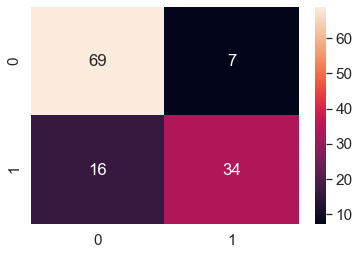

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
df_cm = pd.DataFrame(cm, range(2), range(2))

# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
# sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
sns.heatmap(df_cm, annot=True, fmt='g')

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        76
           1       0.83      0.68      0.75        50

    accuracy                           0.82       126
   macro avg       0.82      0.79      0.80       126
weighted avg       0.82      0.82      0.81       126



In [29]:
# Copy paste from above
y_pred = list(y_pred)
df_y_pred = pd.DataFrame({'cwa_pred':y_pred})
# convert y_test to dataframe
df_y_test = pd.DataFrame({'index':y_test.index, 'test_cwa_value':y_test.values})
df_compare = pd.concat([df_y_test, df_y_pred], axis=1)

df_error = df_compare[(df_compare['test_cwa_value']== 1) & (df_compare['cwa_pred']==0)]
print(len(df_error))

df_error_merged_89 = pd.merge(df_error, df_nhd_ss_89, left_on = 'index', right_on = 'Unnamed: 0', how = 'left')
len(df_error_merged_89)
df_error_merged_89

16


NameError: name 'df_nhd_ss_89' is not defined

In [ ]:
df_error_merged_89.to_csv('/Users/shobhasankar/W210/test-dir/sac_saw_error_merged_89.csv', encoding='utf-8')

In [ ]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    #fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True))

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(20,30))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [ ]:
plot_feature_importance(clf.feature_importances_,X_train.columns,'RANDOM FOREST')